In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [62]:
# file = 'gulosa_20230330-203622.csv'
# file = 'gulosa_2023-03-30-20-48-06.csv'
file = 'aleatoria_2023-03-30-20-47-57.csv'


df = pd.read_csv(file, index_col=0)
df.columns = ['n_movies', 'n_cat','time', "n_movies_watched", "n_hours_watched"]
# Remove outliers
df = df[df['time'] < 0.04]

In [63]:
df.head(5)

,n_movies,n_cat,time,n_movies_watched,n_hours_watched
0,1.0,1.0,0.006835,0.0,0.0
1,1.0,2.0,0.007199,1.0,4.0
2,1.0,3.0,0.006922,1.0,4.0
3,1.0,4.0,0.006656,1.0,3.0
4,1.0,5.0,0.006513,1.0,2.0


In [64]:
df.describe()



,n_movies,n_cat,time,n_movies_watched,n_hours_watched
count,7998.000000,7998.000000,7998.000000,7998.000000,7998.000000
mean,9975.187297,10.501500,0.017124,9.735309,20.679545
std,5773.641217,5.766316,0.005897,3.189302,5.499891
min,1.000000,1.000000,0.006255,0.000000,0.000000
25%,4963.500000,6.000000,0.012045,9.000000,23.000000
50%,9976.000000,11.000000,0.017109,11.000000,23.000000
75%,14951.000000,15.750000,0.022197,12.000000,23.000000
max,19951.000000,20.000000,0.035776,17.000000,23.000000


Text(0.5, 1.0, 'Média de filmes selecionados por número de filmes')

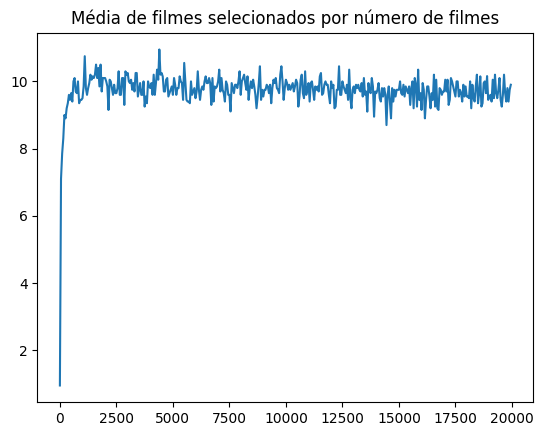

In [65]:
# Plot mean n_output for each n_movies
df_mean = df.groupby('n_movies').mean()
df_mean = df_mean.reset_index()
plt.plot(df_mean["n_movies"], df_mean["n_movies_watched"])
plt.title("Média de filmes selecionados por número de filmes")


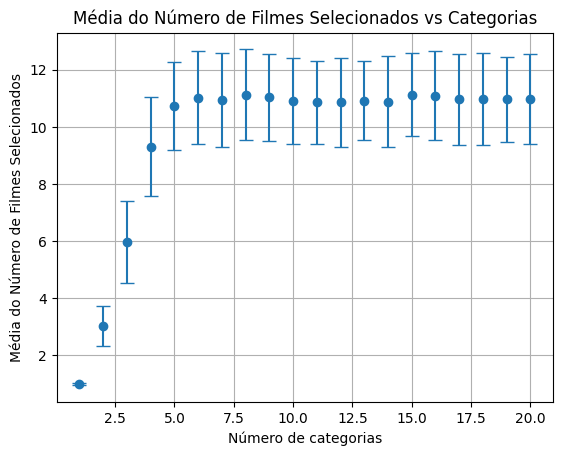

In [66]:
# Plot mean n_output for each n_cat with error bars
df_mean_n_cat = df.groupby('n_cat').mean()
df_mean_n_cat = df_mean_n_cat.reset_index()
plt.errorbar(df_mean_n_cat["n_cat"], df_mean_n_cat["n_movies_watched"], yerr=df.groupby('n_cat').std()["n_movies_watched"], fmt='o', capsize=5)
plt.xlabel('Número de categorias')
plt.ylabel('Média do Número de Filmes Selecionados')
plt.title('Média do Número de Filmes Selecionados vs Categorias')
plt.grid(True)
plt.show()


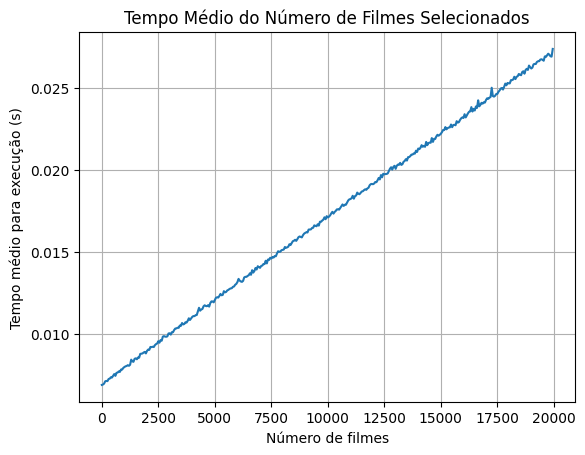

In [67]:
# Plot time vs n_movies
sns.lineplot(x='n_movies', y='time', data=df_mean)
plt.xlabel('Número de filmes')
plt.ylabel('Tempo médio para execução (s)')
plt.title('Tempo Médio do Número de Filmes Selecionados')
plt.grid(True)
plt.show()



<Axes: xlabel='n_cat', ylabel='time'>

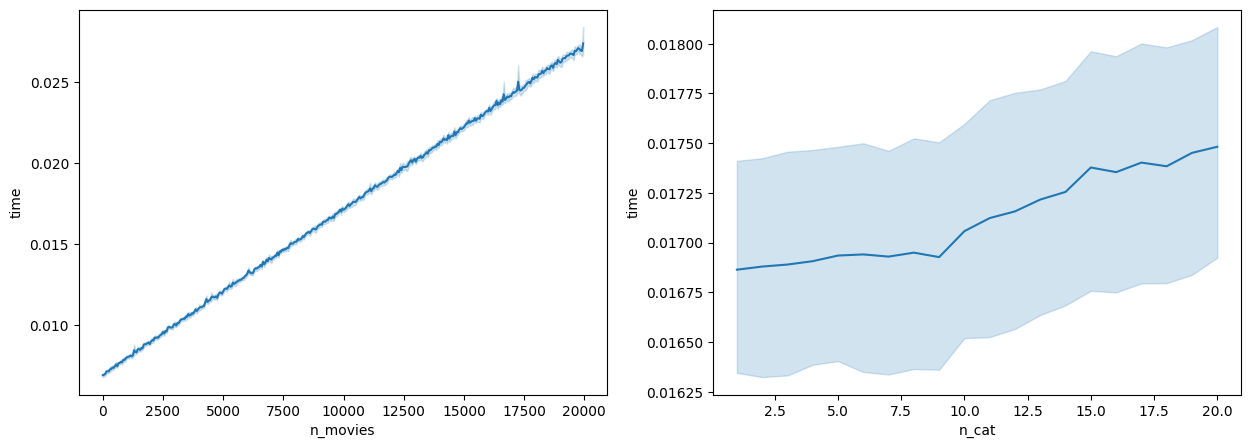

In [68]:
# Plot n_movie vs time and n_cat vs time in separate plots
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.lineplot(data=df, x='n_movies', y='time', ax=ax[0])
sns.lineplot(data=df, x='n_cat', y='time', ax=ax[1])



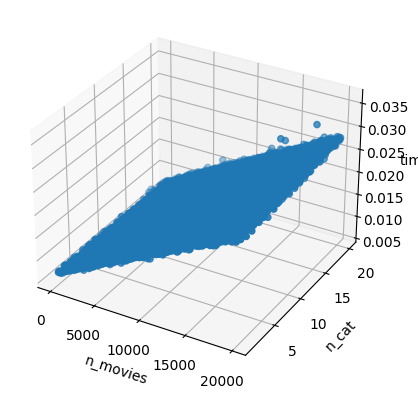

In [69]:
# Plot 3d graph of the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['n_movies'], df['n_cat'], df['time'])
ax.set_xlabel('n_movies')
ax.set_ylabel('n_cat')
ax.set_zlabel('time')
plt.show()


In [70]:
# Plot interactive 3d graph of the results
import plotly.express as px
fig = px.scatter_3d(df, x='n_movies', y='n_cat', z='time')
fig.show()

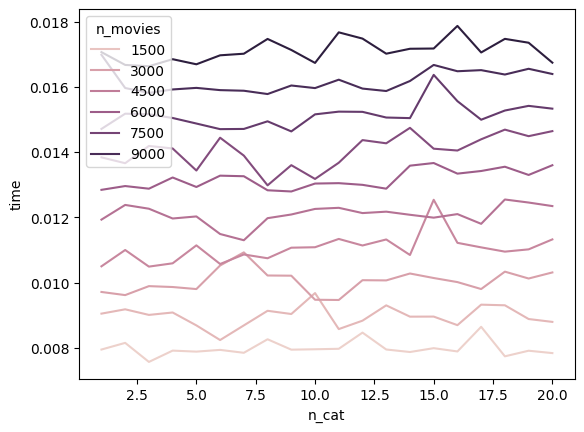

In [71]:
# Get rows where n_movies = 1001 or 2001 or 3001 or 4001 or 5001 or 6001 or 7001 or 8001 or 9001 or 10001
temp = df[df['n_movies'].isin([1001, 2001, 3001, 4001, 5001, 6001, 7001, 8001, 9001, 10001])]
# temp = df[df['n_movies'].isin([ 9001])]


# Plot n_cat vs time for each n_movies in the same plot
sns.lineplot(data=temp, x='n_cat', y='time', hue='n_movies')
plt.show()


